## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()

mice_count

# number of mice = 249

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_all = combined_data.loc[combined_data['Mouse ID'] == "g989",:]
duplicate_mouse_all



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_combined_data

# Backup for clean_combined_data
clean_combined_data_bu = clean_combined_data.copy()
# 13 records of duplicate mouse removed from data frame
clean_combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame

mice_count_clean = clean_combined_data["Mouse ID"].nunique()
mice_count_clean # number of mice = 248

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumure_volume_mean = clean_combined_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumure_volume_median = clean_combined_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumure_volume_variance = clean_combined_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumure_volume_standard_deviation = clean_combined_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumure_volume_SEM = clean_combined_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumure_volume_SEM

summary_stats_table = pd.DataFrame({"Mean Tumor Volume":tumure_volume_mean,
                                    "Median Tumor Volume":tumure_volume_median,
                                    "Tumor Volume Variance":tumure_volume_variance,
                                    "Tumor Volume Std. Dev.": tumure_volume_standard_deviation,
                                    "Tumor Volume Std. Err.": tumure_volume_SEM})



summary_stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_table_agg = clean_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    'mean','median','var','std','sem'])


summary_stats_table_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

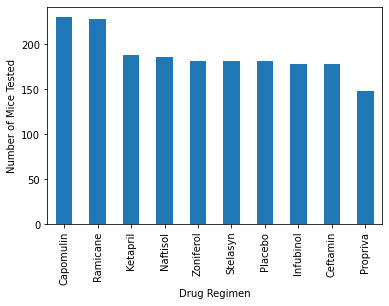

In [15]:
number_tested_mice = clean_combined_data['Drug Regimen'].value_counts()
number_tested_mice


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

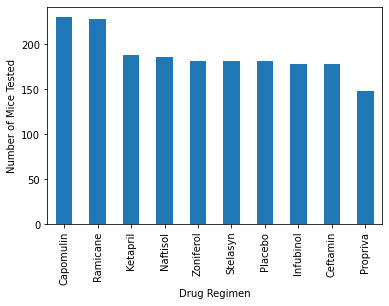

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_tested_mice.plot(kind="bar",xlabel="Drug Regimen",ylabel="Number of Mice Tested")


<AxesSubplot:title={'center':'distribution of female versus male mice'}, ylabel='Sex'>

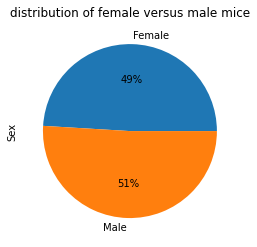

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_grouped =clean_combined_data.groupby("Sex")["Mouse ID"].count()

sex_grouped.plot(kind="pie",y="Sex",title="distribution of female versus male mice",ylabel="Sex",autopct='%1.0f%%')


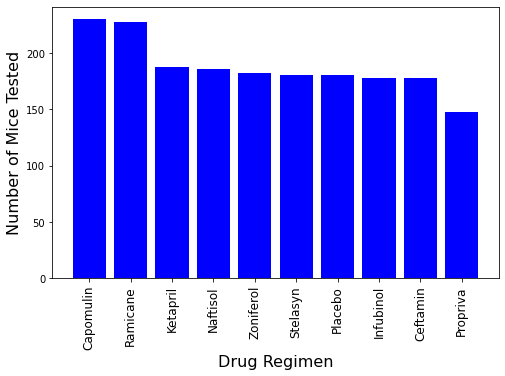

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


x_axis = np.arange(len(number_tested_mice))
y_axis = number_tested_mice

tx = list(number_tested_mice.index.values)
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))

plt.bar(x_axis, y_axis, color ='b',align="center")
plt.xticks(tick_locations, tx, rotation="90", fontsize = 12)




plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Number of Mice Tested",fontsize=16)

plt.show()

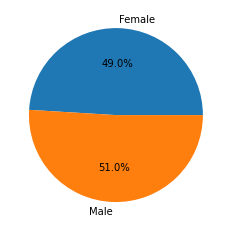

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = sex_grouped.index  ## labels = ["Female","Male"]

title = "distribution of female versus male mice"

plt.pie(sex_grouped,autopct='%1.1f%%',labels=labels)
plt.show()






## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# ftvem = final tumor volume of each mouse

capomulin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Ceftamin", :]

capomulin_df_ftvem = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()
ramicane_df_ftvem = ramicane_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()
infubinol_df_ftvem = infubinol_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()
ceftamin_df_ftvem = ceftamin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clean_combined_data.groupby(['Mouse ID'])['Timepoint'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_rx_df = pd.merge(last_timepoint , clean_combined_data, on=(["Mouse ID","Timepoint"]))
timepoint_rx_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
rx_names = timepoint_rx_df["Drug Regimen"].unique()
rx_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_df =[]

for name in rx_names:
    rx_regimen = timepoint_rx_df.loc[timepoint_rx_df["Drug Regimen"] == name]
    tumor_vol= rx_regimen['Tumor Volume (mm3)']
    
#append tumor data to new list 
    tumor_vol_df.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
# ########     Capomulin    
quartile0 = tumor_vol_df[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

# ########      Ramicane

quartile1 = tumor_vol_df[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

# ########      Infubinol
quartile2 = tumor_vol_df[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)
# ########      Ceftamin

quartile3 = tumor_vol_df[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

    
#Determine outliers using upper and lower bounds





#Print Results  
print(f"For {rx_names[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")

print(f"For {rx_names[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")

print(f"For {rx_names[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")

print(f"For {rx_names[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


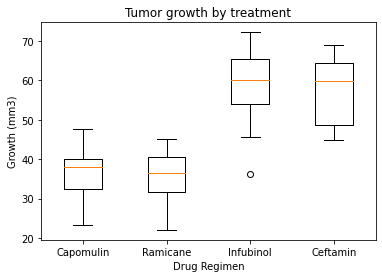

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_df, labels = rx_names)
plt.show()

## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Choose mouse l509 and extract info from dataframe

mouse_l509 =  clean_combined_data.loc[clean_combined_data["Mouse ID"] == "l509"]
mouse_l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


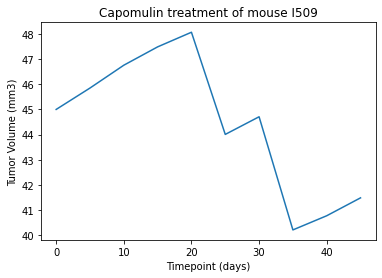

In [33]:
mouse_l509.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)",
                title="Capomulin treatment of mouse I509",
                xlabel="Timepoint (days)",
               ylabel="Tumor Volume (mm3)",
               legend = False)
plt.show()

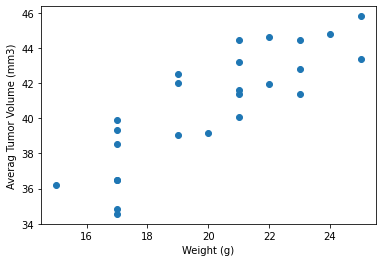

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tv_vs_mw_capomulin =capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(average_tv_vs_mw_capomulin['Weight (g)'],average_tv_vs_mw_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()




## Correlation and Regression

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# 1- correlation Calculate
correlation =(st.pearsonr(average_tv_vs_mw_capomulin['Weight (g)'],average_tv_vs_mw_capomulin['Tumor Volume (mm3)']))
correlation

(0.8419363424694721, 1.3225722434712388e-07)

In [82]:
s=4.994774
1/np.sqrt(1 + s**2)


0.1963134261618579

In [81]:
print(f"The correlation between mouse weight and average tumor volume is {correlation[0]}")

The correlation between mouse weight and average tumor volume is 0.8419363424694721


In [90]:
x_values = average_tv_vs_mw_capomulin['Weight (g)']
y_values = average_tv_vs_mw_capomulin['Tumor Volume (mm3)']

# (slope, intercept, rvalue, pvalue, stderr) 
result = st.linregress(x_values, y_values)
slope= result.slope
intercept = result.intercept
rvalue = result.rvalue
pvalue = result.pvalue
stderr = result.stderr
print(pvalue)

1.3225722434712404e-07


In [88]:
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


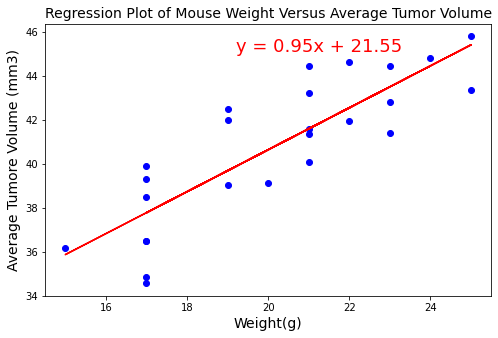

In [111]:
fig1, ax1 = plt.subplots(figsize=(8, 5))

plt.scatter(x_values,y_values, color="b")
plt.plot(x_values,regress_values,"r")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =14)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)

ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95),
             textcoords='axes fraction',horizontalalignment='right', 
             verticalalignment='top',fontsize=18,color="r")

print(f"The r-squared is: {rvalue**2}")


plt.show()